In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# Import stopwords

with open("/Users/LNV/Desktop/Jupiter_Notebook/project/stopwords_ita_apostrophe.txt", "r", encoding="utf8") as stopwords_ita:
    lista_stopwords_ita = []
    
    for word in stopwords_ita:
        lista_stopwords_ita.append(word.strip())
    print(lista_stopwords_ita)

['a', 'â', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinché', "agl'", 'agli', 'ah', 'ahi', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', "all'", 'alla', 'alle', 'allo', 'allora', 'altra', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anch', "anch'", 'anche', 'ancora', 'assai', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'be', "be'", 'beh', 'ben', 'bene', 'benissimo', 'brava', 'bravo', 'buono', "c'", 'caso', 'ce', 'cento', 'certa', 'certe', 'certi', 'certo', "ch'", 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cinque', 'cio', 'cioe', 'cioè', 'circa

In [7]:
# Take a text and return a dictionary with word frequency (no stopwords)

import nltk
import string

from collections import Counter

def from_text_to_dict(text_from_file, lista_stopwords):
    
    list_of_tokens = nltk.word_tokenize(text_from_file.lower())   # tokenize the text
    
    # problem: the apostrophe is treated as a token, thus words like "po'" and "l'" get separated
    # use the package Multi-Word Expression Tokenizer to rejoin them

    no_tokenizer = nltk.tokenize.MWETokenizer(separator="") # separator to have no space between the two elements 
    no_tokenizer.add_mwe(("l", "'"))                        # (it would be _ by default)
    no_tokenizer.add_mwe(("po", "'"))                       # list elements that have to be kept together
    no_tokenizer.add_mwe(("d", "'"))
    no_tokenizer.add_mwe(("c", "'"))
    no_tokenizer.add_mwe(("s", "'"))
    no_tokenizer.add_mwe(("t", "'"))
    no_tokenizer.add_mwe(("n", "'"))
    no_tokenizer.add_mwe(("all", "'"))
    no_tokenizer.add_mwe(("cos", "'"))
    no_tokenizer.add_mwe(("com", "'"))
    no_tokenizer.add_mwe(("dov", "'"))
    no_tokenizer.add_mwe(("ch", "'"))
    no_tokenizer.add_mwe(("vent", "'"))
    no_tokenizer.add_mwe(("quell", "'"))
    no_tokenizer.add_mwe(("nell", "'")) 
    no_tokenizer.add_mwe(("dell", "'")) 
    
    tokens_with_apostrophe = no_tokenizer.tokenize(list_of_tokens)   # apply MWETokenizer to the tokenized text
    
    puncts = string.punctuation        # store the punctuation set in a variable
    
    l=[]
    
    for i in tokens_with_apostrophe:
        if i in puncts:         # remove punctuation 
            pass
        elif i == '``' or i == "''" or i == "--" or i=="–":   # remove weird quotes that keep appearing in Gaber's lyrics
            pass
        else:
            l.append(i)
    
    no_stopwords=[]
    
    for word in l:
        if word not in lista_stopwords:
            no_stopwords.append(word)
    
    word_dict = Counter(no_stopwords)
    
    return word_dict

## De André

In [12]:
corpus_testi_de_andre = open("/Users/LNV/Desktop/Jupiter_Notebook/project/corpus_testi_de_andre.txt", "r", encoding="utf8").read()
print(corpus_testi_de_andre)

Cristo drogato da troppe sconfitte cede alla complicità di Nobel che gli espone la praticità di un' eventuale premio della bontà.  Maria ignorata da un Edipo ormai scaltro mima una sua nostalgia di natività, io con la mia bomba porto la novità, la bomba che debutta in società, al ballo mascherato della celebrità.  Dante alla porta di Paolo e Francesca spia chi fa meglio di lui: lì dietro si racconta un amore normale ma lui saprà poi renderlo tanto geniale.  E il viaggio all' inferno ora fallo da solo con l' ultima invidia lasciata là sotto un lenzuolo, sorpresa sulla porta d' una felicità la bomba ha risparmiato la normalità, al ballo mascherato della celebrità.  La bomba non ha una natura gentile ma spinta da imparzialità sconvolge l' improbabile intimità di un' apparente statua della Pietà.  Grimilde di Manhattan, statua della libertà, adesso non ha più rivali la tua vanità e il gioco dello specchio non si ripeterà Sono più bella io o la statua della Pietà  dopo il ballo mascherato d

In [13]:
word_dict_de_andre = from_text_to_dict(corpus_testi_de_andre, lista_stopwords_ita)
word_dict_de_andre

Counter({'cristo': 3,
         'drogato': 1,
         'troppe': 6,
         'sconfitte': 1,
         'cede': 2,
         'complicità': 1,
         'nobel': 1,
         'espone': 1,
         'praticità': 1,
         'eventuale': 1,
         'premio': 2,
         'bontà': 1,
         'maria': 10,
         'ignorata': 1,
         'edipo': 1,
         'scaltro': 2,
         'mima': 1,
         'nostalgia': 3,
         'natività': 1,
         'bomba': 10,
         'porto': 7,
         'novità': 1,
         'debutta': 1,
         'società': 1,
         'ballo': 10,
         'mascherato': 7,
         'celebrità': 6,
         'dante': 1,
         'porta': 21,
         'paolo': 1,
         'francesca': 1,
         'spia': 1,
         'racconta': 1,
         'amore': 143,
         'normale': 10,
         'saprà': 1,
         'renderlo': 1,
         'geniale': 2,
         'viaggio': 5,
         'inferno': 6,
         'fallo': 2,
         'ultima': 13,
         'invidia': 2,
         'lasciata': 1

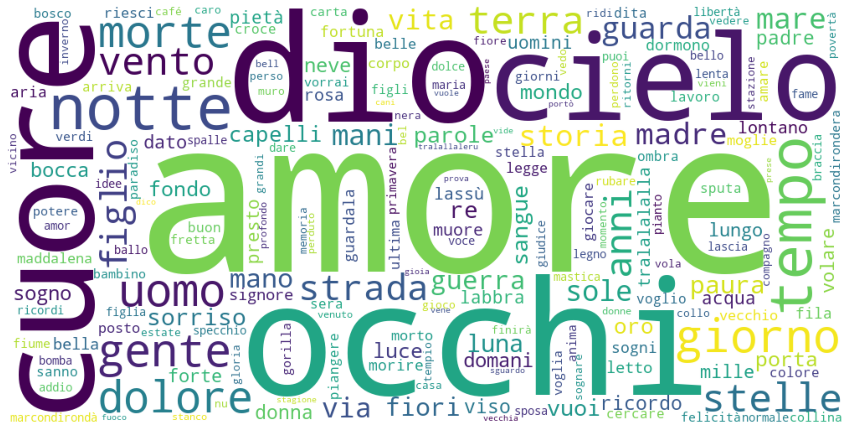

In [15]:
word_cloud = WordCloud(background_color='white', width=1000, height=500).generate_from_frequencies(word_dict_de_andre)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

plt.savefig("./word_cloud_de_andre.png")
plt.close()

## Gaber

In [16]:
corpus_testi_gaber = open("/Users/LNV/Desktop/Jupiter_Notebook/project/corpus_testi_gaber.txt", "r", encoding="utf8").read()
print(corpus_testi_gaber)

Ma la Storia lasciò l'  uomo

al numero 1981

e l'  uomo come congelato

non intravedeva il suo destino.

Non era il capolinea

qualcosa doveva accadere

lo suggeriva una fede spontanea

che non era ancora il tempo di morire.


Il vecchio saggio

e il bimbo appena nato

guardavano la notte

dove il caso è in agguato.


E la notte

lasciava intravedere la notte

col trucco metafisico e scioccante

che l'  è proprio

le cose che riuscivano a stupire

il bimbo e il vecchio.

Come ad esempio su di un cielo eterno

un grattacielo illuminato di pistacchio.


Il vecchio saggio

e il bimbo tra le braccia della mamma

di fronte a quella strana meraviglia

rinnovarono il dilemma

se quelle cose colorate e straordinarie

sarebbero col tempo diventate

se a Dio fosse piaciuto

necessarie.


Ma di una cosa siamo certi

che i loro occhi vedevano

non so se con fiducia o senza scampo

quell'  enorme assurdità che è il tempo.


Signore Iddio, non so se faccia bene o faccia male

assistere ogni tanto a

In [17]:
word_dict_gaber = from_text_to_dict(corpus_testi_gaber, lista_stopwords_ita)
word_dict_gaber

Counter({'storia': 71,
         'lasciò': 2,
         'uomo': 377,
         'numero': 11,
         '1981': 1,
         'congelato': 1,
         'intravedeva': 1,
         'destino': 31,
         'capolinea': 5,
         'doveva': 10,
         'accadere': 6,
         'suggeriva': 1,
         'fede': 18,
         'spontanea': 2,
         'tempo': 125,
         'morire': 49,
         'vecchio': 32,
         'saggio': 7,
         'bimbo': 5,
         'appena': 42,
         'nato': 27,
         'guardavano': 1,
         'notte': 53,
         'agguato': 3,
         'lasciava': 2,
         'intravedere': 3,
         'trucco': 6,
         'metafisico': 1,
         'scioccante': 1,
         'riuscivano': 1,
         'stupire': 4,
         'cielo': 29,
         'eterno': 6,
         'grattacielo': 3,
         'illuminato': 1,
         'pistacchio': 1,
         'braccia': 13,
         'mamma': 88,
         'fronte': 34,
         'strana': 36,
         'meraviglia': 7,
         'rinnovarono': 1,
 

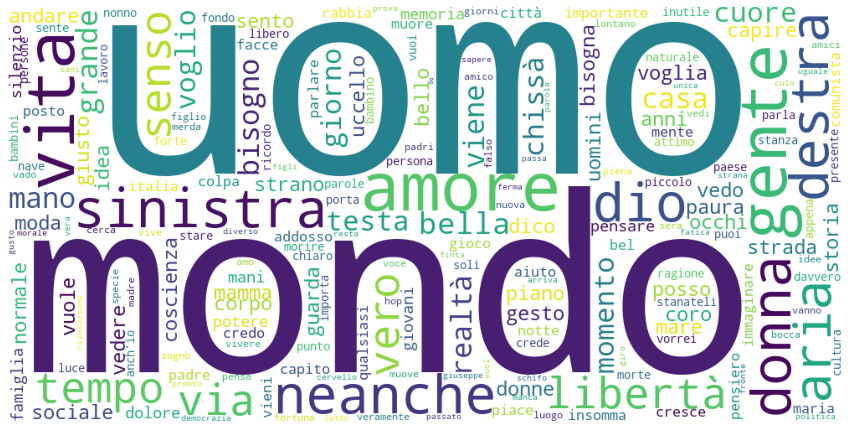

In [18]:
word_cloud = WordCloud(background_color='white', width=1000, height=500).generate_from_frequencies(word_dict_gaber)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

plt.savefig("./word_cloud_gaber.png")
plt.close()

## Guccini

In [5]:
corpus_testi_guccini = open("/Users/LNV/Desktop/Jupiter_Notebook/project/corpus_testi_guccini.txt", "r", encoding="utf8").read()
print(corpus_testi_guccini)

Le Alpi, si sa, sono un muro di sasso una diga confusa, fanno tabula rasa di noi che qui sotto, lontano, più in basso abbiamo la casa la casa ed i piedi in questa spianata di sole che strozza la gola alle rane di nebbia compatta, scabrosa, stirata che sembra di pane, ed una strada antica come l' uomo marcata ai bordi dalla fantasie di un duomo e fiumi, falsi avventurieri che trasformano i padani in marinai non veri. Emilia sdraiata fra i campi e sui prati lagune e piroghe delle terramare guerrieri del Nord dai capelli gessati ne hai visti passare! Emilia allungata fra l' olmo e il vigneto voltata a cercare quel mare mancante e il monte Appennino rivela il segreto e diventa un gigante. Lungo la strada tra una piazza e un duomo hai messo al mondo questa specie d' uomo vero, aperto, finto, strano chiuso, anarchico, verdiano. Brutta razza,l' emiliano! Emilia sognante fra l' oggi e il domani di cibo e motori, di lusso e balere Emilia di facce, di grida, di mani sarà un grande piacere vedere

In [9]:
word_dict_guccini = from_text_to_dict(corpus_testi_guccini, lista_stopwords_ita)
word_dict_guccini

Counter({'alpi': 1,
         'muro': 11,
         'sasso': 4,
         'diga': 1,
         'confusa': 1,
         'tabula': 1,
         'rasa': 1,
         'lontano': 35,
         'basso': 7,
         'casa': 36,
         'spianata': 1,
         'sole': 51,
         'strozza': 1,
         'gola': 3,
         'rane': 2,
         'nebbia': 13,
         'compatta': 1,
         'scabrosa': 1,
         'stirata': 1,
         'pane': 6,
         'strada': 37,
         'antica': 13,
         'uomo': 49,
         'marcata': 2,
         'bordi': 2,
         'fantasie': 3,
         'duomo': 4,
         'fiumi': 2,
         'falsi': 5,
         'avventurieri': 2,
         'trasformano': 1,
         'padani': 1,
         'marinai': 3,
         'veri': 2,
         'emilia': 5,
         'sdraiata': 1,
         'campi': 6,
         'prati': 3,
         'lagune': 1,
         'piroghe': 1,
         'terramare': 1,
         'guerrieri': 1,
         'nord': 6,
         'capelli': 9,
         'gessati': 1

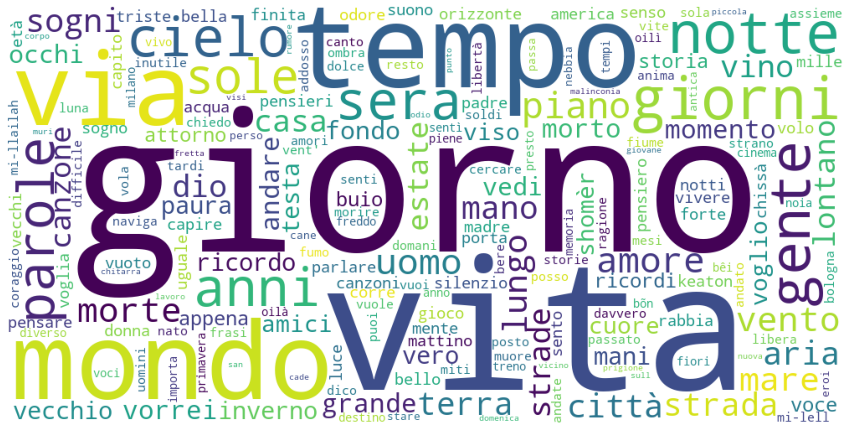

In [11]:
word_cloud = WordCloud(background_color='white', width=1000, height=500).generate_from_frequencies(word_dict_guccini)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

plt.savefig("./word_cloud_guccini.png")
plt.close()